In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score
)

from utils import get_data

# sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
X, y, metadata, variables = get_data('dry_bean_dataset')

In [4]:
y.value_counts(normalize=True)

Class   
DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: proportion, dtype: float64

In [5]:
# Split data into train and test sets.
# We use Stratifield sampling to ensure that the distribution of the data is maintained across the sample.
# Use stratified kfold cross validation to ensure that the model is not overfitting the data

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

In [6]:
idx = variables['type'].isin(['Integer', 'Continuous'])
num_cols = variables.loc[idx, 'name']
num_cols = num_cols.loc[~num_cols.isin(y.columns.tolist())]
num_cols

0                Area
1           Perimeter
2     MajorAxisLength
3     MinorAxisLength
4         AspectRatio
5        Eccentricity
6          ConvexArea
7       EquivDiameter
8              Extent
9            Solidity
10          Roundness
11        Compactness
12       ShapeFactor1
13       ShapeFactor2
14       ShapeFactor3
15       ShapeFactor4
Name: name, dtype: object

In [7]:
idx = variables['type'].isin(['Binary', 'Categorical'])
cat_cols = variables.loc[idx, 'name']
cat_cols = cat_cols.loc[~cat_cols.isin(y.columns)]
cat_cols

Series([], Name: name, dtype: object)

# Train the KMeans

In [8]:
RANDOM_STATE = 42
N_JOBS = -1
VERBOSE = 4

scaler = StandardScaler()
# For KMeans use the default algo and max_iterations
clus = KMeans(n_jobs=N_JOBS, n_init=100)
clus_pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('model', clus)
])


In [9]:
results = {}
for n_clusters in range(2, 20):
    print(f"---------- n_clusters: {n_clusters} ----------")
    clus_pipeline.set_params(model__n_clusters=n_clusters)
    clus_pipeline.fit(X_train)
    
    clus_labels = clus_pipeline.named_steps['model'].labels_
    sil_score = silhouette_score(X_train, clus_labels)
    
    results[n_clusters] = {'inertia': clus_pipeline.named_steps['model'].inertia_,
                           'sil_score': sil_score}

---------- n_clusters: 2 ----------
---------- n_clusters: 3 ----------
---------- n_clusters: 4 ----------
---------- n_clusters: 5 ----------
---------- n_clusters: 6 ----------
---------- n_clusters: 7 ----------
---------- n_clusters: 8 ----------
---------- n_clusters: 9 ----------
---------- n_clusters: 10 ----------
---------- n_clusters: 11 ----------
---------- n_clusters: 12 ----------
---------- n_clusters: 13 ----------
---------- n_clusters: 14 ----------
---------- n_clusters: 15 ----------
---------- n_clusters: 16 ----------
---------- n_clusters: 17 ----------
---------- n_clusters: 18 ----------
---------- n_clusters: 19 ----------


In [10]:
print(results)

{2: {'inertia': 103909.29489958288, 'sil_score': 0.47684158101785473}, 3: {'inertia': 75690.06922701612, 'sil_score': 0.5120177460847136}, 4: {'inertia': 61095.03777715048, 'sil_score': 0.12386790328468149}, 5: {'inertia': 49440.06017885856, 'sil_score': 0.09435179837288529}, 6: {'inertia': 43875.093297567735, 'sil_score': 0.0318757186592522}, 7: {'inertia': 38849.74445680616, 'sil_score': 0.1426455035230774}, 8: {'inertia': 36004.131716988064, 'sil_score': 0.08897261747320823}, 9: {'inertia': 33397.11134946179, 'sil_score': 0.06469054362858452}, 10: {'inertia': 31651.757068233353, 'sil_score': 0.03516640781570613}, 11: {'inertia': 30065.343129738598, 'sil_score': 0.026948340908131085}, 12: {'inertia': 28661.522683129264, 'sil_score': -0.01399095538502876}, 13: {'inertia': 27596.748002226013, 'sil_score': -0.0737426091998521}, 14: {'inertia': 26634.87369827183, 'sil_score': -0.08515478081653746}, 15: {'inertia': 25779.173364302682, 'sil_score': -0.08941964471932437}, 16: {'inertia': 24

<Axes: title={'center': 'Kmeans Elbow plot - Dry Beans'}, xlabel='n_clusters'>

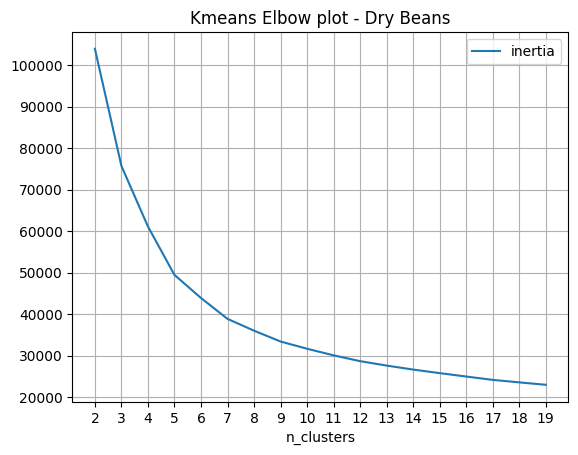

In [11]:
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.columns = ['n_clusters', 'inertia', 'sil_score']
results_df.plot(x='n_clusters', y='inertia',title='Kmeans Elbow plot - Dry Beans', xticks=results_df['n_clusters'], grid=True)

<Axes: title={'center': 'Kmeans Silhoutte Score - Dry Beans'}, xlabel='n_clusters'>

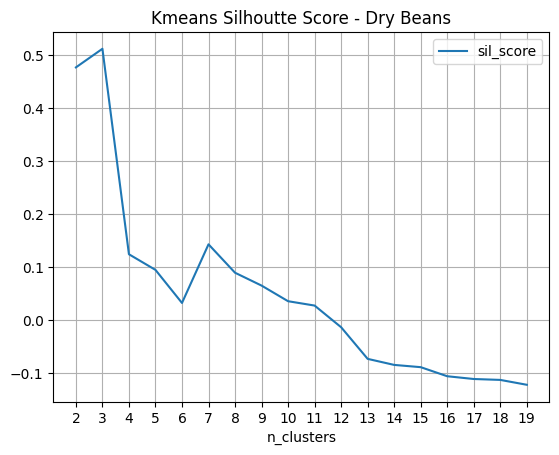

In [12]:
results_df.plot(x='n_clusters', y='sil_score',title='Kmeans Silhoutte Score - Dry Beans', xticks=results_df['n_clusters'], grid=True)

In [13]:
clus_pipeline.set_params(model__n_clusters=3)
label = clus_pipeline.fit_predict(X_train)
print(label.shape)

centroids = clus_pipeline.named_steps['model'].cluster_centers_

(10888,)


In [14]:
X_std = StandardScaler().fit_transform(X_train)
X_std

array([[-0.3713618 , -0.53113068, -0.69536968, ...,  1.11808237,
         1.48524952,  0.95141553],
       [ 0.02895235,  0.49881788,  0.78351767, ..., -1.32149747,
        -1.87953412,  0.15816127],
       [ 0.72707783,  0.79500482,  0.82438155, ..., -0.7876742 ,
        -0.2375073 , -0.35302543],
       ...,
       [ 0.43664179,  0.87746349,  0.47987974, ..., -0.53535794,
        -0.01143779, -1.4807801 ],
       [ 0.01662606,  0.31205264,  0.64565274, ..., -1.18140133,
        -1.61703817, -0.74823181],
       [ 4.01901639,  3.47586447,  3.51587226, ..., -1.68315117,
        -0.80825296, -0.89219251]])

Text(0, 0.5, 'Perimeter')

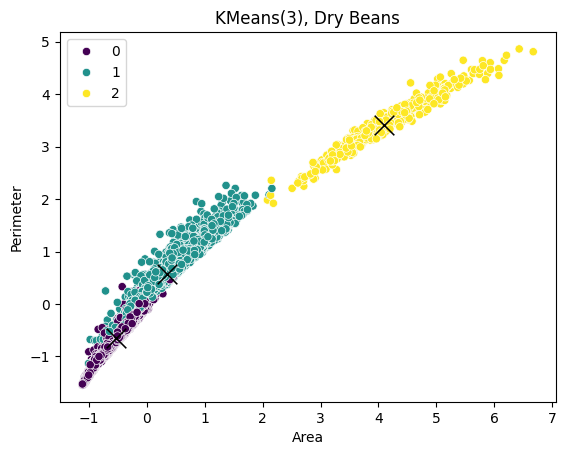

In [15]:

fig, ax = plt.subplots()
sns.scatterplot(x=X_std[:,0], y=X_std[:,1], hue=label, palette='viridis', ax=ax)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], color='black', s=200, marker='x', ax=ax)
ax.set_title("KMeans(3), Dry Beans")
ax.set_xlabel(X_train.columns[0])
ax.set_ylabel(X_train.columns[1])

In [16]:
from itertools import combinations
combs = list(combinations(range(0, X_train.shape[1]), 2))
len(combs)

120

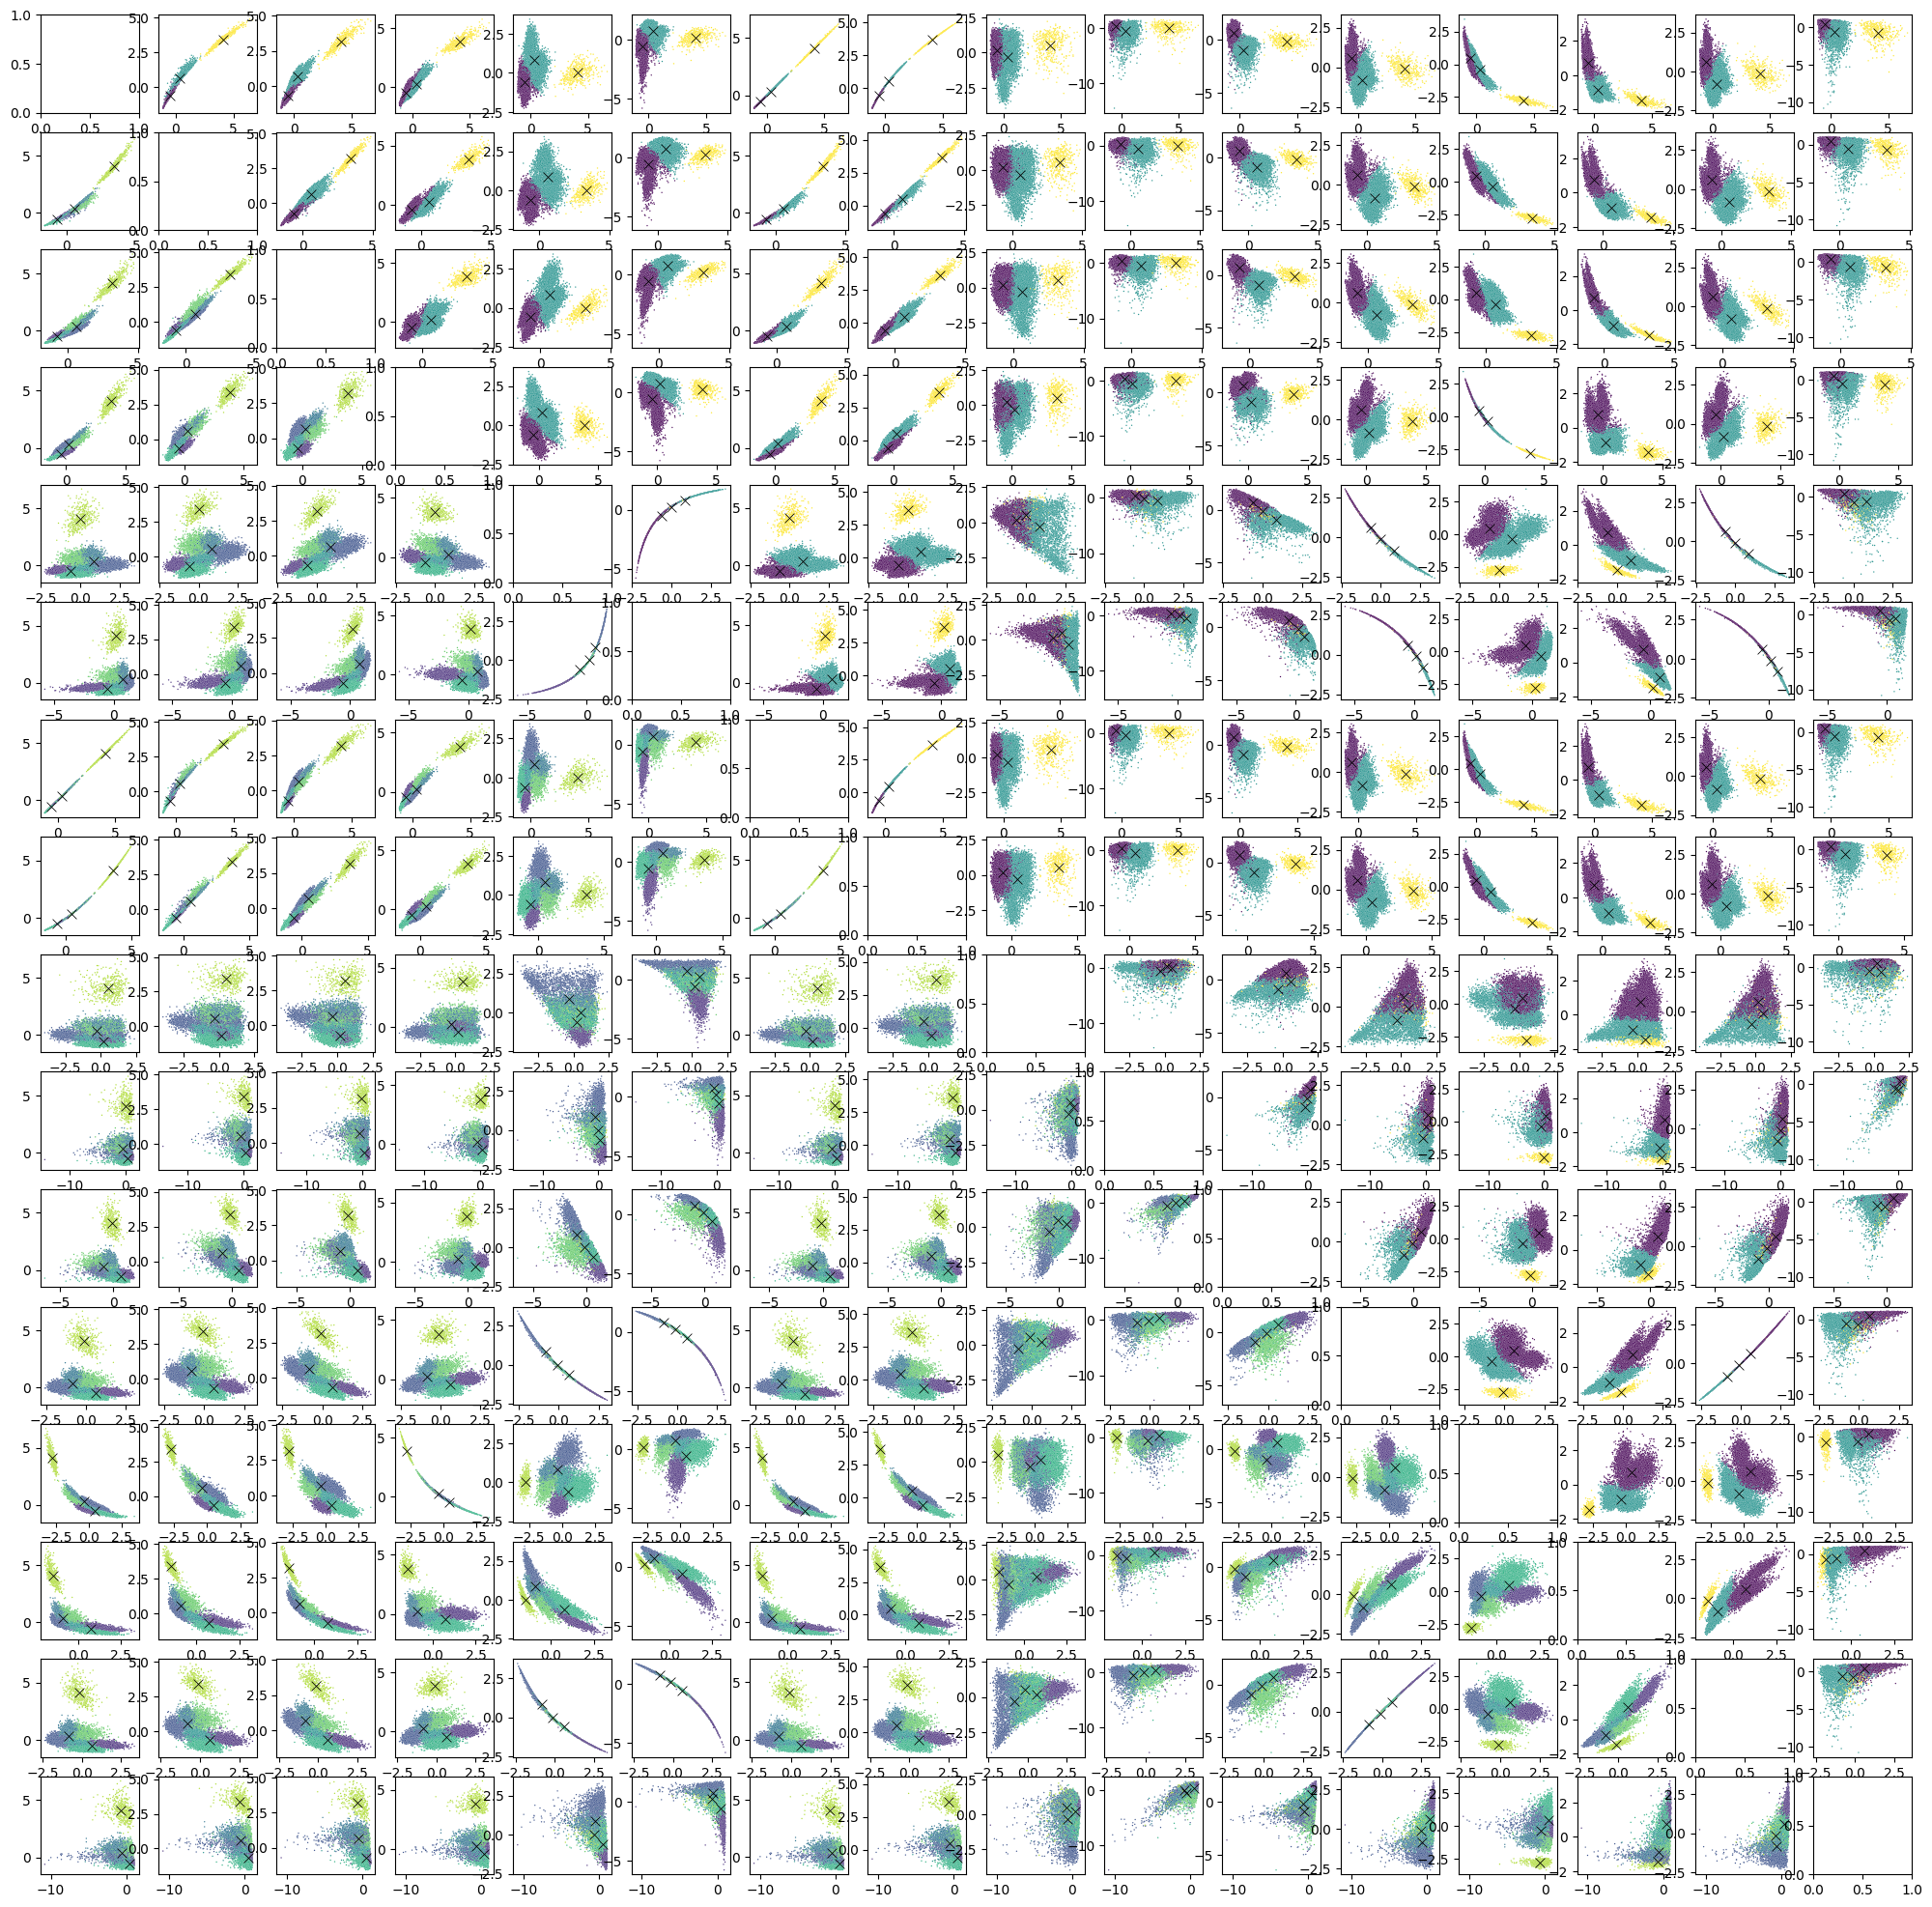

In [32]:
fig, ax = plt.subplots(X_train.shape[1], X_train.shape[1], figsize=(25, 25))
for i, j in combs:
    
    sns.scatterplot(x=X_std[:,i], y=X_std[:,j], hue=label, palette='viridis', ax=ax[i, j], legend=False, s=1)
    sns.scatterplot(x=centroids[:,i], y=centroids[:,j], color='black', s=50, marker='x', ax=ax[i, j])
    # ax[i, j].set_title(f"KMeans(3), Dry Beans")
    # ax[i, j].set_xlabel(X_train.columns[i])
    # ax[i, j].set_ylabel(X_train.columns[j])

    sns.scatterplot(x=X_std[:,j], y=X_std[:,i], hue=y_train.values[:, 0], palette='viridis', ax=ax[j, i], legend=False, s=1)
    sns.scatterplot(x=centroids[:,j], y=centroids[:,i], color='black', s=50, marker='x', ax=ax[j, i])
    # ax[j, i].set_title(f"KMeans(3), Dry Beans")
    # ax[j, i].set_xlabel(X_train.columns[j])
    # ax[j, i].set_ylabel(X_train.columns[i])